# NumPy, SciPy and Pandas

Each of these modules could be the topic of a semester-long course, and we will not get into the details of them. 

One fundemental concept I want to convey is well summarized in this quote from the [SciPy Getting Started page](https://www.scipy.org/getting-started.html):

> Don’t reinvent the wheel, there may already be a pre-made solution for your problem.

To some extent, this can apply to every module. There are certainly other modules that we could cover--[**BioPython**](https://biopython.org/) being one that I highly recommend you check out. As I've stated, Python is somewhat intentionally stripped down, with limited built-in functionality. But a lot of functionality has been added with modules--**make use of them!** 

Whatever you plan to do with Python, take some time to look into what modules are available to help you. Don't reinvent the wheel!

## Here are the general features of these modules


**NumPy** provides array and matrix data types for Python as well as efficient mathematical tools for working with these data types. If your work involves numerical computations, especially matrix manipulations, NumPy is your tool! 

**SciPy** adds additional tools for integration, diffential equations, optimization, and more. Many mathematically-based scientific computations benefit from SciPy.

**Pandas** provides data frames for Python. Data frames are a table representation of data where columns and rows can be named (indexed). Tabular data can be analyzed without data frames, but Pandas and data frames simplify data analysis, and form the foundation of a lot of data science work.


## NumPy and inclusive communities

[NumPy](https://numpy.org/) is undoubtedly an important package for Python and its developers (mostly volunteer) have provided a great service to the community, not only with NumPy itself, but enabling development of packages that use NumPy under the hood to add even more functionality. The developers have however done a great disservice  in failing to address issues of inclusion of diverse talents. 

On September, 16, 2020, *Nature* published the paper [Array Programming with NumPy](https://www.nature.com/articles/s41586-020-2649-2?amp%3Bcode=573df4db-16bd-47ad-b138-d0d9c14134f1) with 26 authors. **All** 26 authors are male! There have been many excuses offered, and commitments to improve ([NumPy Diversity and Inclusion Statement](https://numpy.org/diversity_sep2020/)).

This is not news however, a [2018 analysis by Anthony Scopatz](https://nbviewer.jupyter.org/github/scopatz/nf-project-inequality/blob/9b83df3090c9b9b1b953d2905d428b71165ce607/nf-project-inequality.ipynb), found huge "Inequality of underrepresented groups in PyData Leadership" (this is an interesting read on its own and is presented as a Jupyter Notebook). Here's the main figure from Anthony's analysis:

![image from Anthony Scopatz's analysis, linked from Reshama Shaikh's article on "Why Women Are Flourishing In R Community But Lagging In Python"](https://reshamas.github.io/assets/images/numfocus_os.png)

The analysis showed high inequality in NumPy and many other Python projects.

There is also a very interesting analysis by Reshama Shaikh on "[Why Women Are Flourishing In R Community But Lagging In Python](https://reshamas.github.io/why-women-are-flourishing-in-r-community-but-lagging-in-python/)" which contrasts the Python and R communities. I highly recommend reading Rashama's article, it has many good insights as to why R, in general, has succeeded in attracting a more diverse developer community.

As I mentioned when looking at Git and Github and the need for developer communities to be more inclusive of racial diversity, stop using offensive terms, and actively work to foster racial diversity, the same is true for gender diversity (Anthony's article also makes a great point about including non-binary people in assessment of diversity).

While I am disappointed in the NumPy history and will encourage reforms, if we choose to stop using NumPy, we would not be able to use Python for a wide array (pun intended) of applications. So, we will use NumPy, but also commit to increasing diversity and acknowledge historical wrongs.

## NumPy Array and Matrix

While lists can do a lot, NumPy offers robust support for arrays and matrices and the math associated with them.

One thing we haven't seen yet, is the `import as` construct. We could just `import numpy`, but then when we use a NumPy function, we'd have to type, for example, `numpy.array([6, 7, 8])`. If we instead `import numpy as np`, we make a shorthand and can call array with `np.array([6, 7, 8])`--a few letters shorted each time we type it.

In [4]:
import numpy as np

my_array=np.array([6, 7, 8])  # Make an array, show type and print it.
print(type(my_array))
print(my_array)

<class 'numpy.ndarray'>
[6 7 8]


In [5]:
matrix = np.arange(15).reshape(5, 3)  # Make 5X3 matrix of the numbers 0-14.
matrix

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
my_array.reshape(3,1)  # Reshape the array to be a vector with 3 rows, 1 column

array([[6],
       [7],
       [8]])

In [7]:
prod=my_array * matrix  # Matrix multiplication
prod

array([[  0,   7,  16],
       [ 18,  28,  40],
       [ 36,  49,  64],
       [ 54,  70,  88],
       [ 72,  91, 112]])

We could keep going, but would quickly get to the end of my matrix math understanding! But there are functions to make matrixes with 1s on the diagonals, transpose matrices, calculate eigenvectors, etc.

## SciPy

The example here is from the [SciPy Getting Started page](https://www.scipy.org/getting-started.html). I am not concerned about the details. First the demo:

In [8]:
from scipy import special, optimize

f = lambda x: -special.jv(3, x)
sol = optimize.minimize(f, 1.0)
x = np.linspace(0, 10, 5000)
print(x)


[0.00000000e+00 2.00040008e-03 4.00080016e-03 ... 9.99599920e+00
 9.99799960e+00 1.00000000e+01]


We'll need the `pyplot` funtion of `matplotlib` to plot the graph.

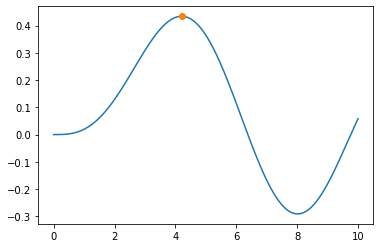

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, special.jv(3, x), '-', sol.x, -sol.fun, 'o')
plt.show()


Looks good...maybe useful...

But really, I wanted to show you the script on the same page:

```python

"""example.py

Compute the maximum of a Bessel function and plot it.

"""
import argparse

import numpy as np
from scipy import special, optimize
import matplotlib.pyplot as plt

def main():
    # Parse command-line arguments
    parser = argparse.ArgumentParser(usage=__doc__)
    parser.add_argument("--order", type=int, default=3, help="order of Bessel function")
    parser.add_argument("--output", default="plot.png", help="output image file")
    args = parser.parse_args()

    # Compute maximum
    f = lambda x: -special.jv(args.order, x)
    sol = optimize.minimize(f, 1.0)

    # Plot
    x = np.linspace(0, 10, 5000)
    plt.plot(x, special.jv(args.order, x), '-', sol.x, -sol.fun, 'o')

    # Produce output
    plt.savefig(args.output, dpi=96)

if __name__ == "__main__":
    main()
    
```

And really all I wanted to talk about was the last couple of lines:

```python
if __name__ == "__main__":
    main()
```


### `if __name__ == "__main__":`

I want to show you this because it is common and also a bit confusing if you don't understand it.

`__name__` is a variable that Python uses to tell if the code is being launched from the command line, or has been called as a function. Let's use an addition function from earlier as an example:

In [12]:
def add_two(a,b):
    c=a+b
    return c

num1=float(input("Please type one number:"))
num2=float(input("Please type another number:"))

print(num1, "+", num2,"=", add_two(num1,num2))

# Saved as add_two_prompt.py

Please type one number: 5
Please type another number: 6


5.0 + 6.0 = 11.0


Note that I haven't added all the good `try:`/`except:` and other cool stuff to make this more robust, but whatever...

Now, let's imagine `add_two` is the most amazing function ever written and in our next script we realize that we want to use the `add_two` function.

Let's save the above to a file called `add_two_prompt.py`, and run it on the command line:

```bash
$ python add_two_prompt.py
Please type one number:4
Please type another number:5
4.0 + 5.0 = 9.0
$
```



In [13]:
import add_two_prompt


Please type one number: 5
Please type another number: 6


5.0 + 6.0 = 11.0


But as soon as we import the add_two_prompt script, the script is run, prompting the user for the numbers and calling the function! That probably isn't what we want!

We want to import the function and be able to run it with two numbers. We don't want to prompt the user for numbers, we just want to be able to call the `add_two` function.

We could edit the add_two_prompt script to remove the part about prompting the user for numbers, but that would break that neat functionality.

What we want is to only prompt the user for numbers when we run the script from the command line, but otherwise, we just want to add the add_two function to our toolbox.

The way to do that is with the `if __name__ == "__main__":`

Let's change the script to look like:

```python
#!/usr/bin/env python3

def add_two(a,b):
    c=a+b
    return c

def main():
    num1=float(input("Please type one number:"))
    num2=float(input("Please type another number:"))

    print(num1, "+", num2,"=", add_two(num1,num2))

if __name__ == "__main__":
    main()

# Saved as add_two_ifmain.py
```


That works on the command line still.

But we can import it and use as intended:

In [14]:
import add_two_ifmain

score=20
bonus=5

print("Your score is:", add_two_ifmain.add_two(score,bonus))

Your score is: 25


By moving the interactive parts of the program to the "main" function and using the `__name__` variable, we have the best of both worlds.

Mostly I want to show this because you will find a lot of examples that look like this and it can be confusing if you don't understand what they are doing.

## Pandas

Pandas makes analyzing tabular data so much easier. There's a lot that can be done in Pandas, but let's use our flights data as an example.

Turns out there's a similar dataset online here:

In [15]:
import pandas as pd

# Note you will likely need to update the path here!!!
# This file is too large for git, but is available at: 
#   https://www.dropbox.com/s/jizx4ijnpxmi3av/flights.May2017-Apr2018.csv?dl=0

# Importing the whole dataset takes >4GB of RAM. To avoid this, let's use just a few columns.
columns=['FL_DATE','ORIGIN','DEST','ARR_DELAY_NEW','WEATHER_DELAY']

# The usecols argument is a list of columns to import.
df=pd.read_csv("../shared_data/flights.May2017-Apr1018.csv", usecols=columns)


df.head()

,FL_DATE,ORIGIN,DEST,ARR_DELAY_NEW,WEATHER_DELAY
0,2017-05-01,LAX,IAD,50.0,0.0
1,2017-05-01,LAX,IAD,0.0,NaN
2,2017-05-01,SAN,SFO,0.0,NaN
3,2017-05-01,SFO,EWR,111.0,0.0
4,2017-05-01,JFK,SFO,6.0,NaN


In [16]:
# Count rows where the ORIGIN or DEST are GNV and the ARR_DELAY_NEW is > 0.
df[((df.ORIGIN=='GNV') | (df.DEST=='GNV')) & df.ARR_DELAY_NEW>0].count()

FL_DATE          1525
ORIGIN           1525
DEST             1525
ARR_DELAY_NEW    1525
WEATHER_DELAY     804
dtype: int64

In [ ]:
late = df[((df.ORIGIN=='GNV') | (df.DEST=='GNV')) & df.ARR_DELAY_NEW>0]
late.head()

We could keep going with this, but where to stop...

## Keep going...

There's a ton of online resources for Pandas. Here's a few suggestions:

* [Top 8 resources for learning data analysis with Pandas](https://www.dataschool.io/best-python-pandas-resources/)

* The videos and Juyter notebooks from: [Easier data analysis in Python with Pandas](https://www.dataschool.io/easier-data-analysis-with-pandas/)

* The [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) has a chapter on Pandas. This is a great book!
